In [5]:
import numpy as np
import matplotlib.pyplot as plt

from neural_zoo import NeuralZoo
from super_input import SuperInput
from params import default_neuron_params
from soen_sim import network

### Monosynaptic Point Neuron

In [2]:
times = np.arange(0,150,25)
indices = np.zeros(len(times)).astype(int)
def_spikes = [indices,times]
input = SuperInput(channels=1, type='defined', defined_spikes=def_spikes, duration=150)
default_ib = default_neuron_params['ib_n']

Generating pre-defined input...


50


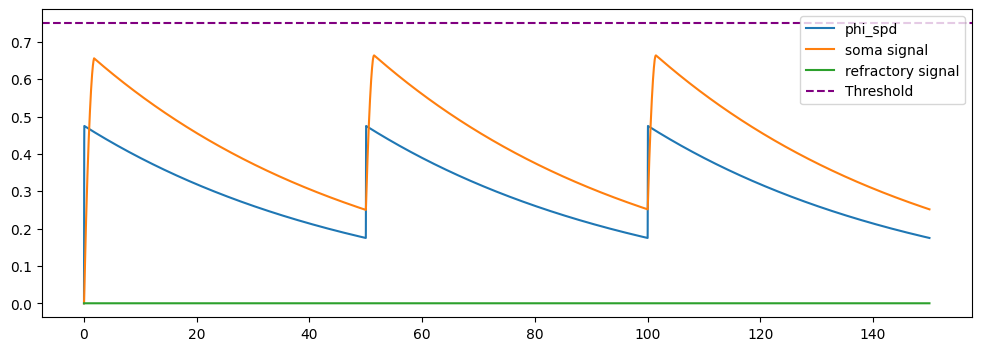

In [3]:
synaptic_structure = [[[1]]]
default_neuron_params['s_th'] = 0.75

default_neuron_params['tau_ni'] = 50
mono = NeuralZoo(type="custom",synaptic_structure=synaptic_structure,**default_neuron_params)
mono.synapses[0][0][0].add_input(input.signals[0])

net = network(name = 'network_under_test')
net.add_neuron(mono.neuron)
net.run_sim(dt = .01, tf = 150)
net.get_recordings()
print(mono.dendrites[0][0][0].tau_ni)
spd = mono.synapses[0][0][0].phi_spd
signal = mono.dendrites[0][0][0].s
ref = mono.neuron.dend__ref.s

plt.figure(figsize=(12,4))

plt.plot(net.t,spd, label='phi_spd')
plt.plot(net.t,signal, label='soma signal')
plt.plot(net.t,ref, label='refractory signal')

plt.axhline(y = mono.s_th, color = 'purple', linestyle = '--',label='Threshold')
plt.legend()

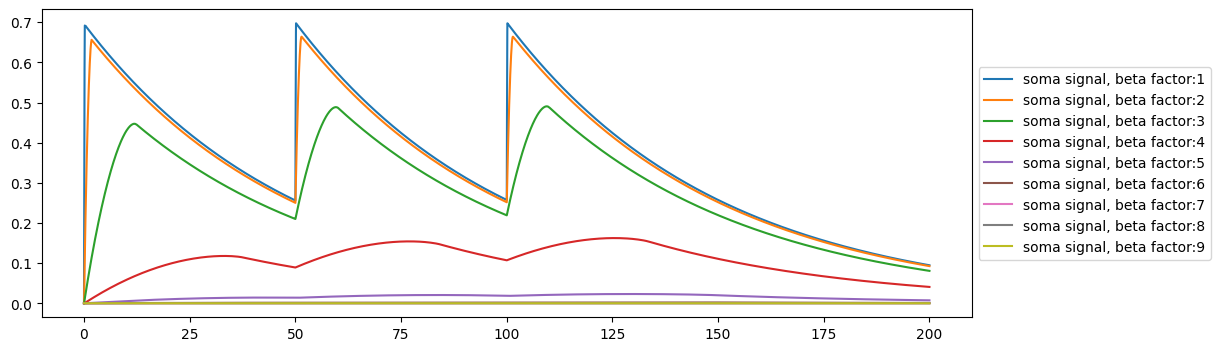

In [4]:
beta_factor = np.arange(1,10,1)
default_neuron_params['s_th'] = 0.75
plt.figure(figsize=(12,4))
for b in beta_factor:
    
    default_neuron_params['beta_ni'] = 2*np.pi*(10**b)

    mono = NeuralZoo(type="custom",synaptic_structure=synaptic_structure,**default_neuron_params)
    mono.synapses[0][0][0].add_input(input.signals[0])

    net = network(name = 'network_under_test')
    net.add_neuron(mono.neuron)
    net.run_sim(dt = .01, tf = 200)
    t = mono.neuron.time_params['time_vec']
    signal = mono.dendrites[0][0][0].s
    plt.plot(t,signal, label=f'soma signal, beta factor:{b}')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

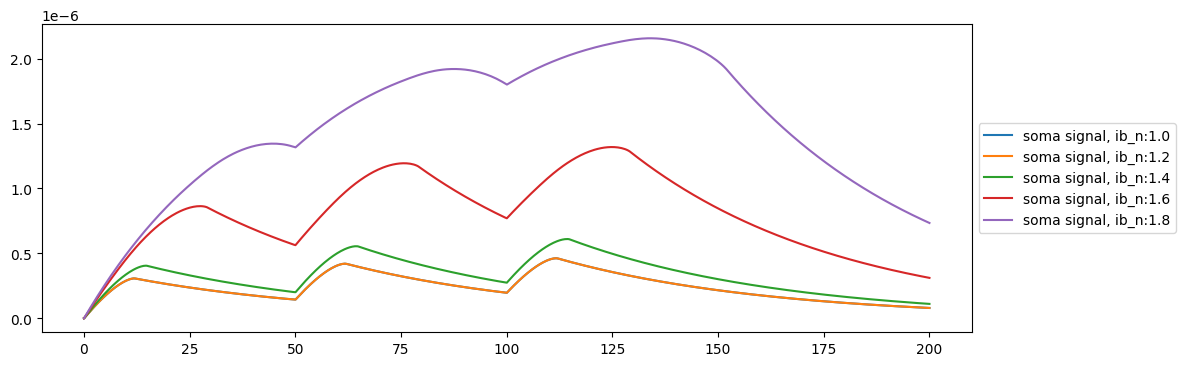

In [5]:
neuron_biases = np.arange(1,2,.2)
default_neuron_params['s_th'] = 0.75
plt.figure(figsize=(12,4))
for ib_n in neuron_biases:
    
    default_neuron_params['ib_n'] = ib_n

    mono = NeuralZoo(type="custom",synaptic_structure=synaptic_structure,**default_neuron_params)
    mono.synapses[0][0][0].add_input(input.signals[0])

    net = network(name = 'network_under_test')
    net.add_neuron(mono.neuron)
    net.run_sim(dt = .01, tf = 200)
    t = mono.neuron.time_params['time_vec']
    signal = mono.dendrites[0][0][0].s
    plt.plot(t,signal, label=f'soma signal, ib_n:{np.round(ib_n,2)}')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Monosynaptic Neuron with Intermediate Dendrite

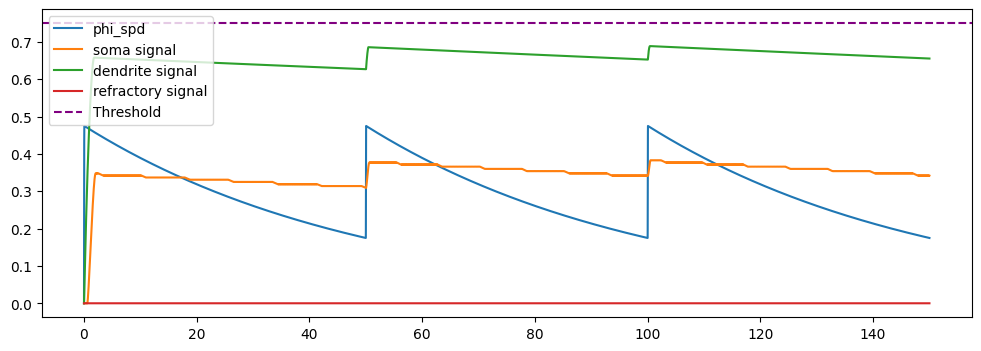

In [6]:
default_neuron_params['beta_ni'] = 2*np.pi*1e2
default_neuron_params['ib_n'] = default_ib
default_neuron_params['s_th'] = 0.75
synaptic_structure = [[[0]],[[1]]]
weights = [[[.5]]]
mono_dend = NeuralZoo(type="custom",weights=weights, synaptic_structure=synaptic_structure,**default_neuron_params)

mono_dend.synapses[1][0][0].add_input(input.signals[0])
net = network(name = 'network_under_test')
net.add_neuron(mono_dend.neuron)
net.run_sim(dt = .01, tf = 150)
net.get_recordings()

spd = mono_dend.synapses[1][0][0].phi_spd
signal = mono_dend.dendrites[0][0][0].s
dend_s = mono_dend.dendrites[1][0][0].s
ref = mono_dend.neuron.dend__ref.s

plt.figure(figsize=(12,4))
plt.plot(net.t,spd, label='phi_spd')
plt.plot(net.t,signal, label='soma signal')
plt.plot(net.t,dend_s, label='dendrite signal')
plt.plot(net.t,ref, label='refractory signal')
plt.axhline(y = mono_dend.s_th, color = 'purple', linestyle = '--',label='Threshold')
plt.legend()
plt.show()


### Monosynaptic Neuron with Intermediate Dendrite and Somatic Synaptic Connection

{1: 1}
{'unnamed_neuron__n16__nr_ni__dend_refraction': -0.9428376726979629, 'lay0_branch0_den0': 0.1}
{1: 1}


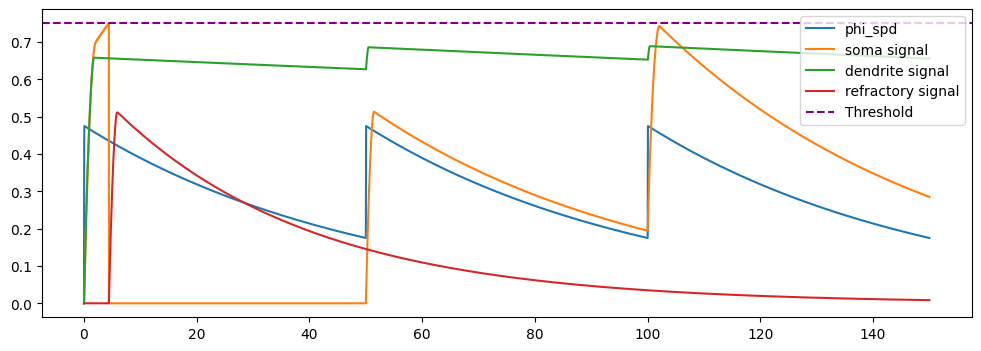

In [7]:
default_neuron_params['beta_ni'] = 2*np.pi*1e2
default_neuron_params['ib_n'] = default_ib
default_neuron_params['s_th'] = 0.75
# default_neuron_params['integration_loop_time_constant'] = 10
# default_neuron_params['integration_loop_time_constant__refraction'] = 1000
# default_neuron_params['tau_ref'] = 10
synaptic_structure = [[[1]],[[1]]]
weights = [[[.1]]]
mono_dend_ss = NeuralZoo(type="custom",weights=weights, synaptic_structure=synaptic_structure,**default_neuron_params)

mono_dend_ss.synapses[1][0][0].add_input(input.signals[0])
mono_dend_ss.synapses[0][0][0].add_input(input.signals[0])

net = network(name = 'network_under_test')
net.add_neuron(mono_dend_ss.neuron)
net.run_sim(dt = .01, tf = 150)
net.get_recordings()
print(mono_dend_ss.neuron.dend__nr_ni.synaptic_connection_strengths)
print(mono_dend_ss.neuron.dend__nr_ni.dendritic_connection_strengths)
print(mono_dend_ss.dendrites[1][0][0].synaptic_connection_strengths)
spd = mono_dend_ss.synapses[1][0][0].phi_spd
signal = mono_dend_ss.dendrites[0][0][0].s
dend_s = mono_dend_ss.dendrites[1][0][0].s
ref = mono_dend_ss.neuron.dend__ref.s

plt.figure(figsize=(12,4))
plt.plot(net.t,spd, label='phi_spd')
plt.plot(net.t,signal, label='soma signal')
plt.plot(net.t,dend_s, label='dendrite signal')
plt.plot(net.t,ref, label='refractory signal')
plt.axhline(y = mono_dend_ss.s_th, color = 'purple', linestyle = '--',label='Threshold')
plt.legend()
plt.show()

In [8]:
times = np.arange(0,150,25)
indices = np.zeros(len(times)).astype(int)
def_spikes = [indices,times]
input = SuperInput(channels=1, type='defined', defined_spikes=def_spikes, duration=150)

default_neuron_params['s_th'] = .75

Generating pre-defined input...


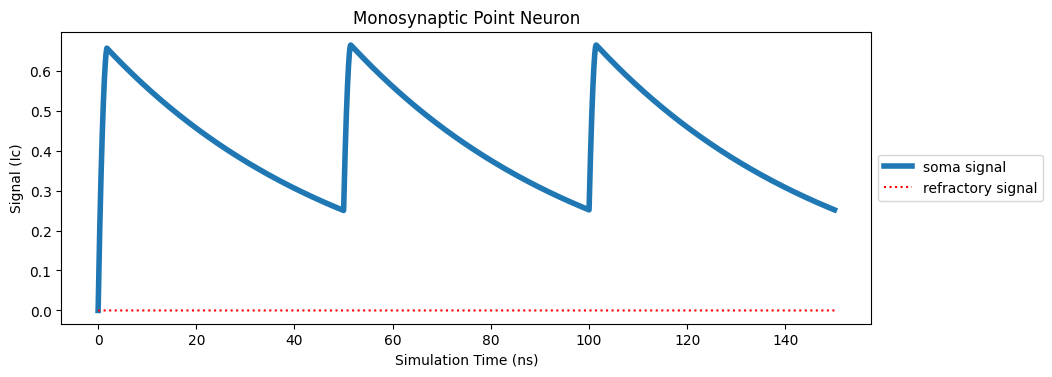

In [10]:
# Monosynaptic point neuron
mono_point = NeuralZoo(type='mono_point',**default_neuron_params)
mono_point.synapses[0][0][0][0].add_input(input.signals[0])
net = network(sim=True,dt=.01,tf=150,nodes=[mono_point])
mono_point.plot_neuron_activity(net,title="Monosynaptic Point Neuron")

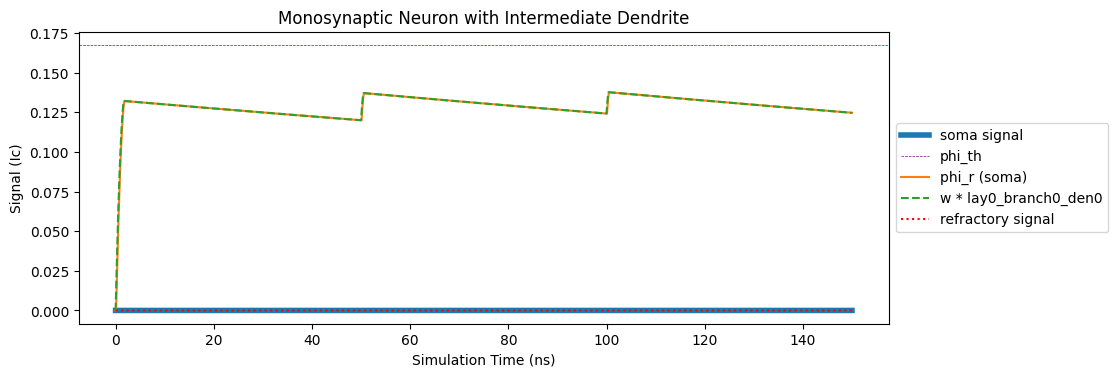

In [11]:
# Monosynaptic neuron with dendrite
# check wobbles
default_neuron_params['w_dn'] = 0.2
mono_dend = NeuralZoo(type='mono_dendrite',**default_neuron_params)
mono_dend.synapses[0][1][0][0].add_input(input.signals[0])
net = network(sim=True,dt=.1,tf=150,nodes=[mono_dend])
title = "Monosynaptic Neuron with Intermediate Dendrite"
mono_dend.plot_neuron_activity(net,phir=True,title=title)


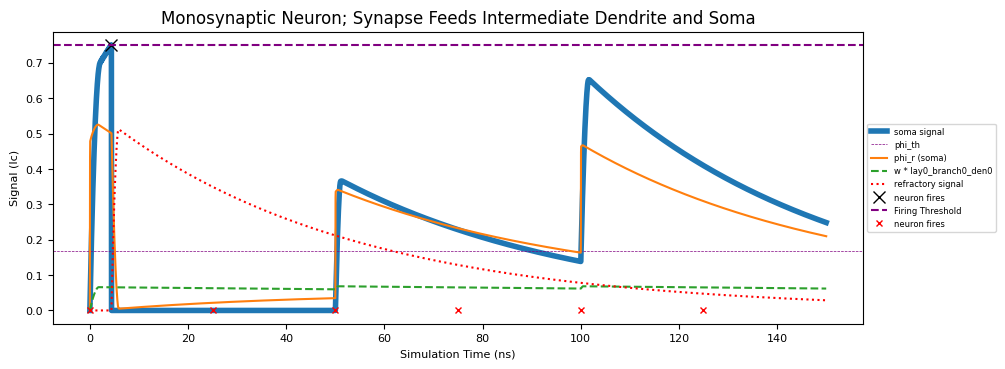

In [13]:
# Monosynaptic neuron with dendrite and skip connection
mono_dend_soma = NeuralZoo(type='mono_dend_soma',**default_neuron_params)
mono_dend_soma.synapses[0][1][0][0].add_input(input.signals[0])
net = network(sim=True,dt=.01,tf=150,nodes=[mono_dend_soma])
title = "Monosynaptic Neuron; Synapse Feeds Intermediate Dendrite and Soma"
mono_dend_soma.plot_neuron_activity(net,title=title,input=input,phir=True)

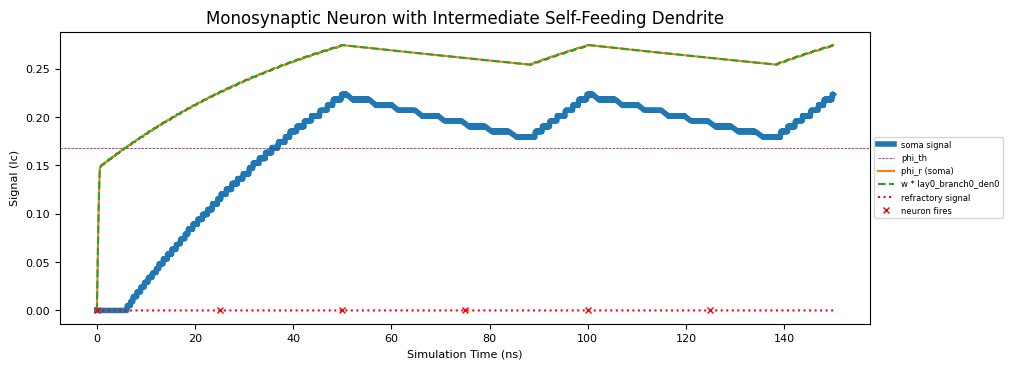

In [15]:
# # Self-feeding intermediate dendrite
# # check rollover
self_feed = NeuralZoo(type='self_feed',**default_neuron_params)
self_feed.synapses[0][1][0][0].add_input(input.signals[0])
net = network(sim=True,dt=.01,tf=150,nodes=[self_feed])
title = "Monosynaptic Neuron with Intermediate Self-Feeding Dendrite"
self_feed.plot_neuron_activity(net,title=title,phir=True,input=input)

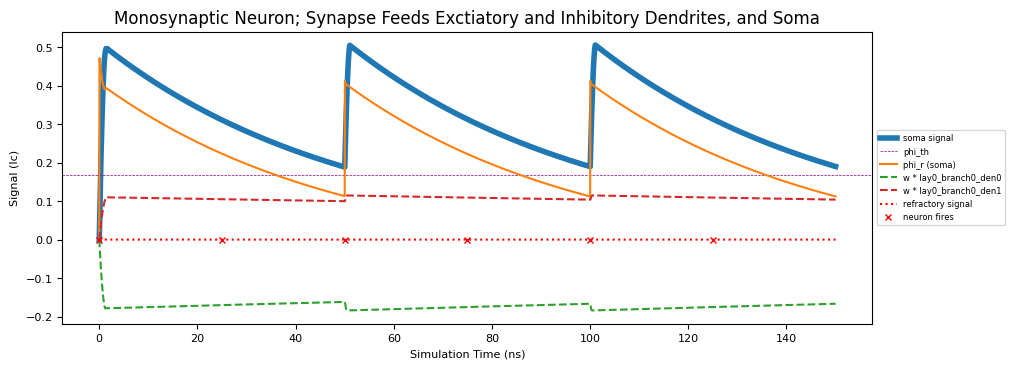

In [16]:
# Synapse feeds 1E, 1I, and soma
mono_plus_minus = NeuralZoo(type='mono_plus_minus',**default_neuron_params)
mono_plus_minus.synapses[0][1][0][0].add_input(input.signals[0])
mono_plus_minus.synapses[0][1][0][1].add_input(input.signals[0])
mono_plus_minus.synapses[0][0][0][0].add_input(input.signals[0])
net = network(sim=True,dt=.01,tf=150,nodes=[mono_plus_minus])
title = "Monosynaptic Neuron; Synapse Feeds Exctiatory and Inhibitory Dendrites, and Soma"
mono_plus_minus.plot_neuron_activity(net,title=title,input=input,phir=True)

In [17]:
# # Double refractory
# # default_neuron_params['s_th'] = 0.3
# double_ref = NeuralZoo(type='double_ref',**default_neuron_params)
# double_ref.synapses[0][1][0][0].add_input(input.signals[0])
# # print(double_ref.neuron.dend__nr_ni.dendritic_connection_strengths)
# net = network(sim=True,dt=.01,tf=150,nodes=[double_ref])
# title = "double_ref"
# double_ref.neuron.plot_simple = True
# net.plot()
# double_ref.plot_neuron_activity(net,title=title)

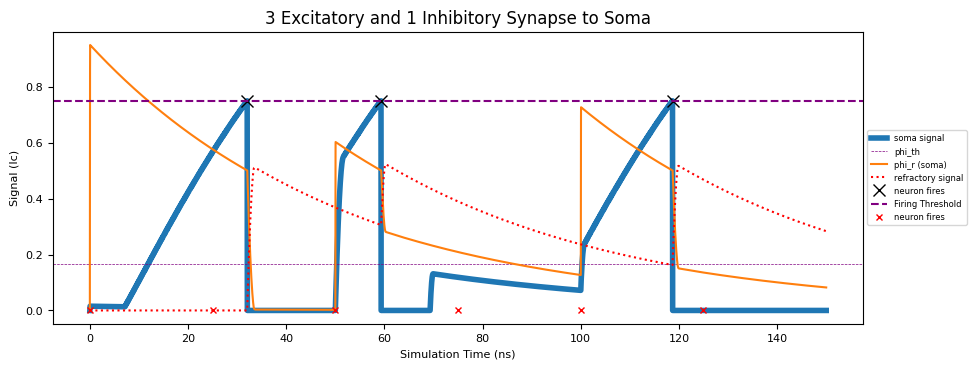

In [18]:
# 3 excitatory and 1 inhibitory synapse, all feeding soma
point_3ex_1in = NeuralZoo(type='point_3ex_1in',**default_neuron_params)
point_3ex_1in.synapses[0][0][0][0].add_input(input.signals[0])
point_3ex_1in.synapses[1][0][0][0].add_input(input.signals[0])
point_3ex_1in.synapses[2][0][0][0].add_input(input.signals[0])
point_3ex_1in.synapses[3][0][0][0].add_input(input.signals[0])
net = network(sim=True,dt=.01,tf=150,nodes=[point_3ex_1in])
title = "3 Excitatory and 1 Inhibitory Synapse to Soma"
point_3ex_1in.plot_neuron_activity(net,title=title,input=input,phir=True)

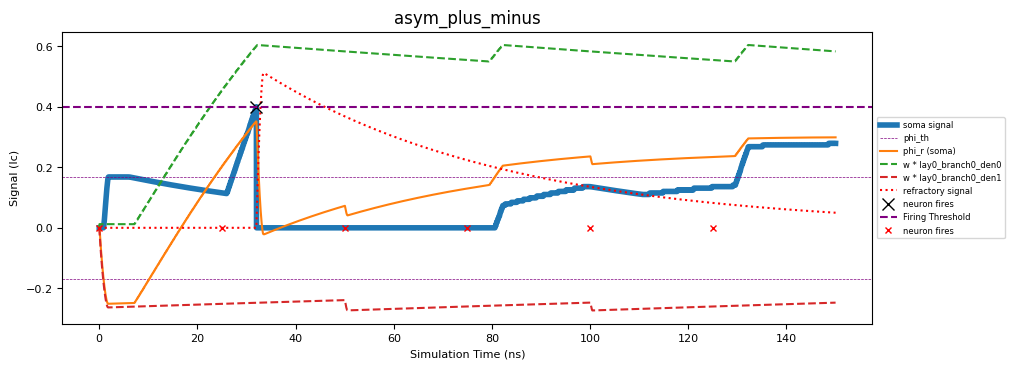

In [20]:
# Assymmetrical neuron
default_neuron_params['s_th'] = .4
asym_plus_minus = NeuralZoo(type='asym_plus_minus',**default_neuron_params)
asym_plus_minus.synapses[0][1][0][0].add_input(input.signals[0])
asym_plus_minus.synapses[1][1][0][0].add_input(input.signals[0])
asym_plus_minus.synapses[2][1][0][0].add_input(input.signals[0])
asym_plus_minus.synapses[3][1][0][0].add_input(input.signals[0])
asym_plus_minus.synapses[4][1][0][1].add_input(input.signals[0])
net = network(sim=True,dt=.01,tf=150,nodes=[asym_plus_minus])
title = "asym_plus_minus"
asym_plus_minus.plot_neuron_activity(net,title=title,input=input,phir=True)

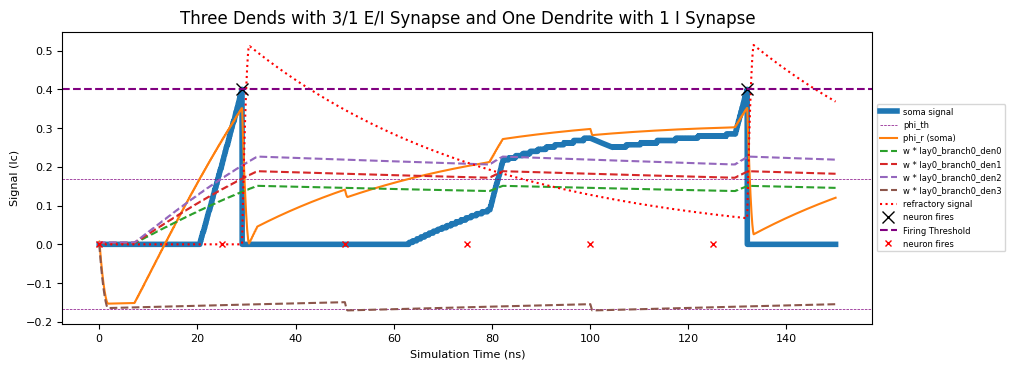

In [21]:
# Three Dends with 3/1 E/I Synapse and One Dendrite with 1 I Synapse
denex3_denin1 = NeuralZoo(type='denex3_denin1',**default_neuron_params)

denex3_denin1.synapses[0][1][0][0].add_input(input.signals[0])
denex3_denin1.synapses[1][1][0][0].add_input(input.signals[0])
denex3_denin1.synapses[2][1][0][0].add_input(input.signals[0])
denex3_denin1.synapses[3][1][0][0].add_input(input.signals[0])

denex3_denin1.synapses[4][1][0][1].add_input(input.signals[0])
denex3_denin1.synapses[5][1][0][1].add_input(input.signals[0])
denex3_denin1.synapses[6][1][0][1].add_input(input.signals[0])
denex3_denin1.synapses[7][1][0][1].add_input(input.signals[0])

denex3_denin1.synapses[8][1][0][2].add_input(input.signals[0])
denex3_denin1.synapses[9][1][0][2].add_input(input.signals[0])
denex3_denin1.synapses[10][1][0][2].add_input(input.signals[0])
denex3_denin1.synapses[11][1][0][2].add_input(input.signals[0])

denex3_denin1.synapses[12][1][0][3].add_input(input.signals[0])

net = network(sim=True,dt=.01,tf=150,nodes=[denex3_denin1])
title = "Three Dends with 3/1 E/I Synapse and One Dendrite with 1 I Synapse"
denex3_denin1.plot_neuron_activity(net,title=title,input=input,phir=True)

basalsomainput:  {'unnamed_neuron__n14__nr_ni__dend_refraction': <soen_sim.dendrite object at 0x00000203DE2F8760>, 'lay0_branch0_den0': <soen_sim.dendrite object at 0x00000203CA76CA00>, 'lay0_branch0_den1': <soen_sim.dendrite object at 0x00000203CA76E500>, 'lay0_branch0_den2': <soen_sim.dendrite object at 0x00000203CA76C910>}


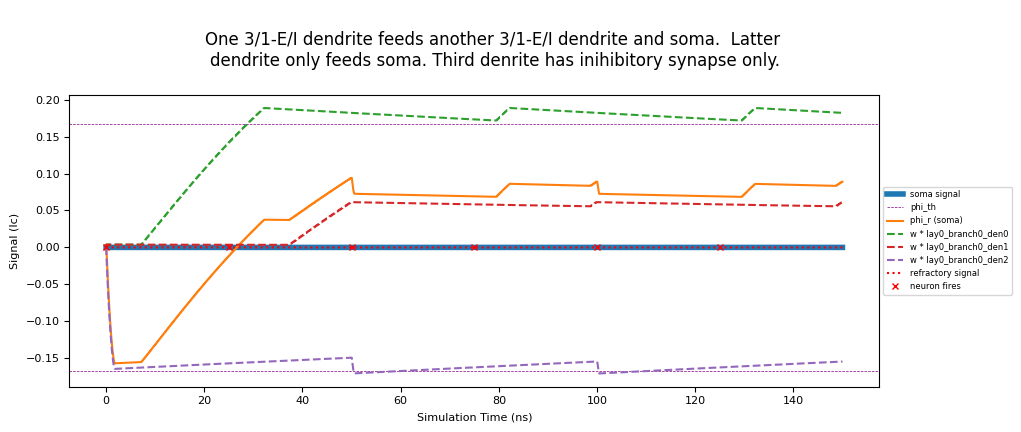

In [23]:
# Prximal/basal neuron
# # check soma input
proximal_basal = NeuralZoo(type='proximal_basal',**default_neuron_params)

proximal_basal.synapses[0][1][0][0].add_input(input.signals[0])
proximal_basal.synapses[1][1][0][0].add_input(input.signals[0])
proximal_basal.synapses[2][1][0][0].add_input(input.signals[0])
proximal_basal.synapses[3][1][0][0].add_input(input.signals[0])

proximal_basal.synapses[4][1][0][1].add_input(input.signals[0])
proximal_basal.synapses[5][1][0][1].add_input(input.signals[0])
proximal_basal.synapses[6][1][0][1].add_input(input.signals[0])
proximal_basal.synapses[7][1][0][1].add_input(input.signals[0])

proximal_basal.synapses[8][1][0][2].add_input(input.signals[0])

net = network(sim=True,dt=.01,tf=150,nodes=[proximal_basal])
print("basalsomainput: ",proximal_basal.dendrites[0][0][0].dendritic_inputs)
title = '''
        One 3/1-E/I dendrite feeds another 3/1-E/I dendrite and soma.  Latter 
        dendrite only feeds soma. Third denrite has inihibitory synapse only.
        '''
proximal_basal.plot_neuron_activity(net,title=title,input=input,phir=True)